## Import Libraries

In [1]:
# Import pandas library
import pandas as pd

# Import DataReader, Just type pip install pandas_datareader in your anaconda prompt
from pandas_datareader import DataReader

# Import date library
from datetime import date

# Import numpy library
import numpy as np

# Import matplotlib library
import matplotlib.pyplot as plt

# Import Seaborn library
import seaborn as sns

# 1.Importing stock listing data from Excel

## Reading, inspecting, & cleaning data from csv files

### Import stock listing info from the NASDAQ

In [10]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/nasdaq-listings.csv')
# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

  IPO Year             Sector  \
0     1980         Technology   
1      NAN         Technology   
2     2004         Technology   
3     1986         Technology   
4     199

### Read data using .read_csv() with adequate parsing arguments

#### .read_csv() options:

##### na_values: Converts a given string to np.nan, defaults to None
##### parse_dates: Reads the data in a list of given columns as dtype datetime64, defaults to False

In [11]:
# Import the data
nasdaq = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
print(nasdaq.head())

# Inspect the data
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

## Read data from Excel worksheets


### Load listing info from a single sheet

In [12]:
# Import the data
nyse = pd.read_excel('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx', sheetname='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

### Load listing data from two sheets

In [17]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


## Combine data from multiple worksheets


###  Load all listing data and iterate over key-value dictionary pairs

In [72]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx', sheetname='nyse', na_values='n/a')
nasdaq = pd.read_excel('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx', sheetname='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 
combined_listings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software,NYSE
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments,NYSE
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,NYSE
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing",NYSE
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines,NYSE


### Automate the loading and combining of data from multiple Excel worksheets

In [49]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


# 2.Importing financial data from the web

## The DataReader: Access financial data online

### Get stock data for a single company

In [8]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016, 12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'google'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

              Open    High     Low   Close    Volume
Date                                                
2016-11-25  111.47  111.87  110.95  111.79  11475922
2016-11-28  111.43  112.46  111.39  111.57  27193983
2016-11-29  110.78  112.03  110.07  111.46  28528750
2016-11-30  111.60  112.20  110.27  110.52  36162258
2016-12-01  110.36  110.94  109.03  109.49  37086862
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-25 to 2017-11-22
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


### Visualize a stock price trend

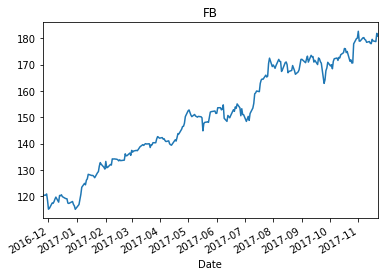

In [10]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'google'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot Close
stock_prices['Close'].plot(title=ticker)

# Show the plot
plt.show()

## Economic data from the Federal Reserve


### Visualize the long-term gold price trend

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12953 entries, 1968-04-01 to 2017-11-22
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12555 non-null float64
dtypes: float64(1)
memory usage: 202.4 KB


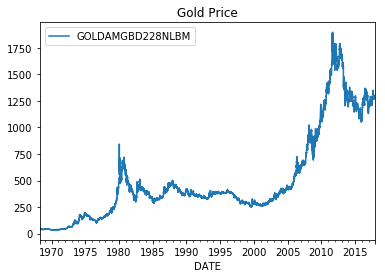

In [13]:
# Set start date
start = date(1968, 1, 1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

### Compare labor market participation and unemployment rates

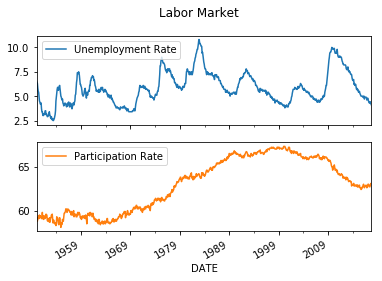

In [14]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start=start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate','Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

###  Compare bond and stock performance

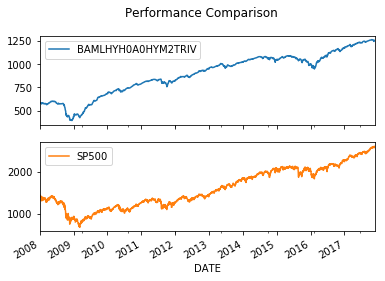

In [15]:
# Set the start date
start = date(2008, 1, 1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(title='Performance Comparison',subplots=True)

# Show the plot
plt.show()

## Select stocks and get data from Google Finance

### Select the top 5 listed consumer companies 

In [19]:
# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

                   Company Name Exchange  Market Capitalization
4              Amazon.com, Inc.   nasdaq           4.221385e+11
3013      Wal-Mart Stores, Inc.     nyse           2.218646e+11
3014  Walt Disney Company (The)     nyse           1.789973e+11
6           Comcast Corporation   nasdaq           1.764745e+11
1438     Home Depot, Inc. (The)     nyse           1.752626e+11


### Get the ticker of the largest consumer services company

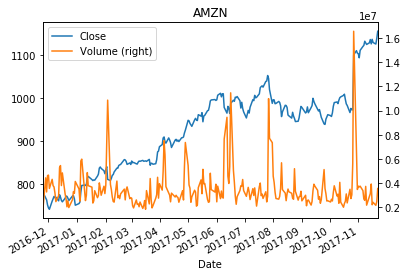

In [41]:
# Get ticker of the largest Consumer Services company
ticker = listings.loc[listings.Sector=='Consumer Services', 'Market Capitalization'].idxmax()
ticker

# Set the start date
start = date(2012, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

### Get the largest consumer company listed after 1998

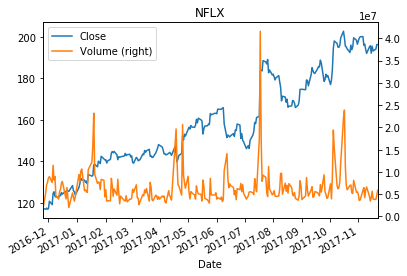

In [43]:
# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(1998, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

## Get several stocks & manage a MultiIndex

###  Get data for the 3 largest financial companies

In [44]:
# Get ticker of 3 largest finance companies
top_3_companies = listings.loc[listings.Sector=='Finance','Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2012, 1, 1)

# Import stock data
data = DataReader(top_3_tickers, 'google', start)
data2 = data.to_frame()

# Unstack and inspect result
data2['Close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2016-11-25 to 2017-11-22
Data columns (total 3 columns):
BAC    250 non-null float64
JPM    250 non-null float64
WFC    250 non-null float64
dtypes: float64(3)
memory usage: 7.8 KB


# Summarizing your data and visualizing the result

## Summarize your data with descriptive stats

### List the poorest and richest countries worldwide

#### Result: The countries with the highest per capita income are Qatar, Macao SAR, Luxembourg, Singapore, and Brunei.

In [20]:
# Import the data
income = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Country              184 non-null object
Income per Capita    184 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


### Global incomes: Central tendency

#### Result: Rounded down to the nearest thousand, the most common value in Income per Capita is 1.0.

In [46]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573694
11620.932519999998


0    1.0
dtype: float64

###  Describe the distribution of your data with quantiles



###  Global incomes: Dispersion

In [21]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, mean+std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([.25, .75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[.75] - quantiles[.25]
print(iqr)

[-2497.441641469137, 41436.28077294301]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.39573


### Deciles of the global income distribution

np.arange(start, stop, step)

###  Deciles of the global income distribution

#### Result: The height difference between any two adjacent bars is the same.

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


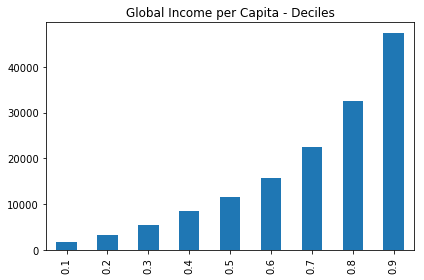

In [27]:
# Generate range of deciles
quantiles = np.arange(.1, .91, .1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

## Visualize the distribution of your data

### Visualizing international income distribution

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)

       Income per Capita
count         184.000000
mean        19469.419566
std         21966.861207
min           618.752859
25%          3922.358940
50%         11620.932520
75%         26558.754670
max        141542.662800


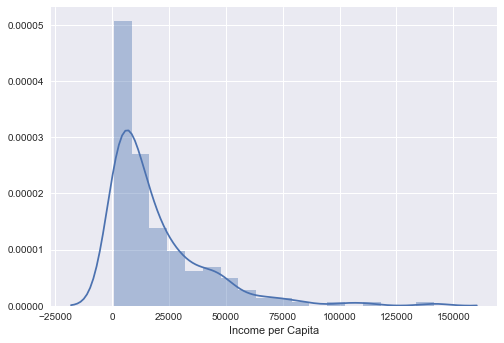

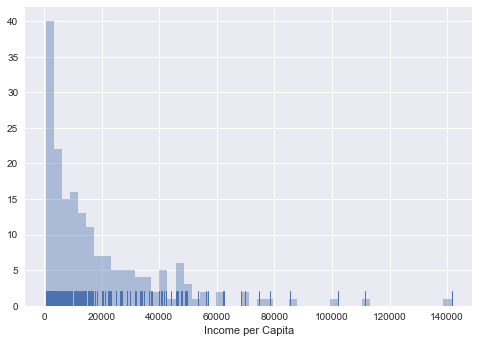

In [30]:
# Import seaborn
import seaborn as sns

# Import matplotlib
import matplotlib.pyplot as plt

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

### Growth rates in Brazil, China, and the US

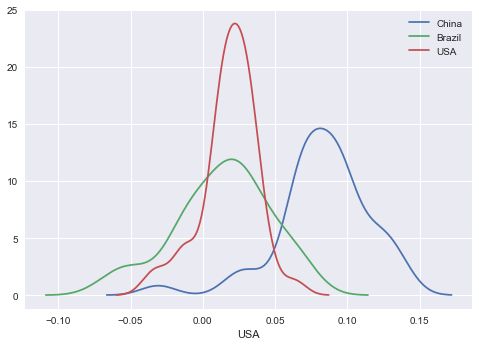

In [32]:
# Load the file into growth
growth = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()

###  Highlighting values in the distribution

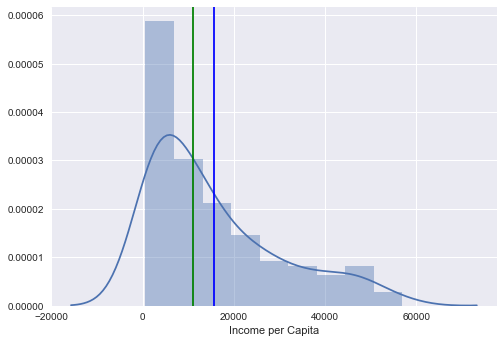

In [33]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

### Companies by sector on all exchanges

 listings information from previous exercises has been loaded into a dictionary listings for which the keys are 'amex', 'nasdaq', and 'nyse'

# 4.Aggregating and describing your data by category

## Aggregating your data by category

### Result: Companies in the Health Care sector in the NYSE have the highest median market capitalization.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
Exchange                 3147 non-null object
dtypes: float64(3), object(5)
memory usage: 196.8+ KB


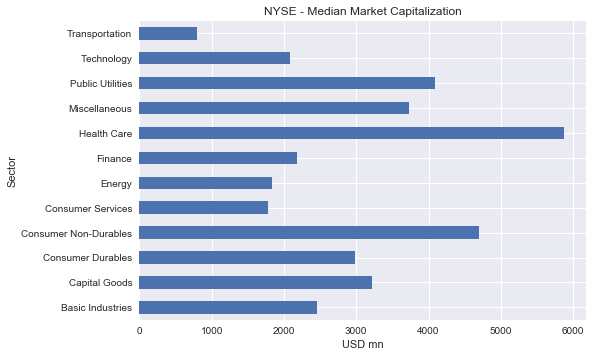

In [36]:
# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

##  Median market capitalization by IPO year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6314 entries, 0 to 3166
Data columns (total 8 columns):
Stock Symbol             6314 non-null object
Company Name             6314 non-null object
Last Sale                6244 non-null float64
Market Capitalization    6314 non-null float64
IPO Year                 2747 non-null float64
Sector                   4944 non-null object
Industry                 4944 non-null object
Exchange                 6314 non-null object
dtypes: float64(3), object(5)
memory usage: 444.0+ KB
  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year 

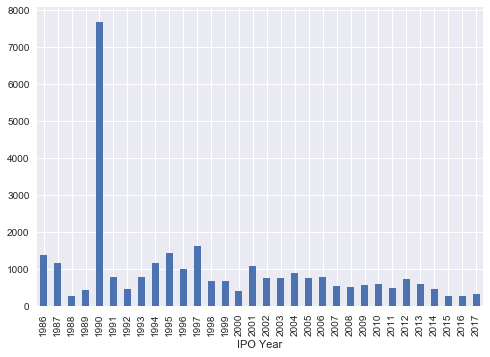

In [42]:
# Import the data
nasdaq = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/nasdaq-listings.csv')

# Inspect listings
combined_listings.info()

# Show listings head
print(combined_listings.head())

# Create market_cap_m
combined_listings['market_cap_m'] = combined_listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
combined_listings = combined_listings[combined_listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
combined_listings['IPO Year'] = combined_listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = combined_listings.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

### All summary statistics by sector

In [43]:
# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
Stock Symbol             1115 non-null object
Company Name             1115 non-null object
Last Sale                1115 non-null float64
Market Capitalization    1115 non-null float64
IPO Year                 1115 non-null object
Sector                   1115 non-null object
Industry                 1115 non-null object
Last Update              1115 non-null object
dtypes: float64(2), object(6)
memory usage: 69.8+ KB
                      Last Sale                                            \
                          count        mean         std     min       25%   
Sector                                                                      
Basic Industries           24.0   48.873542   33.946536   3.425  21.51500   
Capital Goods              66.0   50.771970   46.557148   5.230  28.08500   
Consumer Durables          24.0   46.610000   36.281527   8.840  26.57250   
Consumer 

### Company value by exchange and sector

#### Result: The NYSE has the highest median market capitalization for each sector

Sector            Exchange
Basic Industries  amex         148.564581
                  nasdaq       150.385214
                  nyse        2450.240499
Capital Goods     amex          49.596035
                  nasdaq       293.801019
Name: market_cap_m, dtype: float64


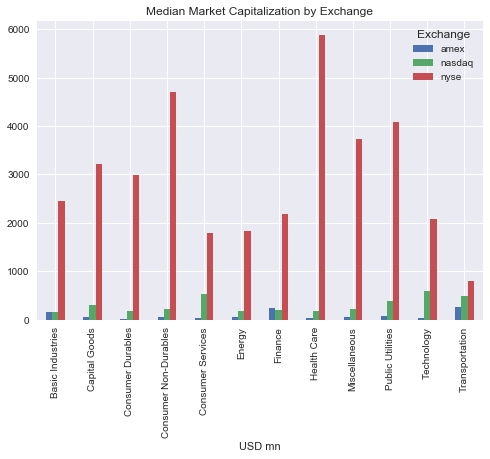

In [52]:
# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
listing_data.drop('Market Capitalization', axis=1, inplace=True)

# Group listings by Sector and Exchange
by_sector_exchange = listing_data.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('USD mn')

# Show the plot
plt.show()

###  Calculate several metrics by sector and exchange

In [55]:
# Create market_cap_m
#listings_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listing_data.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})

# Print the summary
print(summary)

                                     Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        391.646249   148.564581          605.307911
                      nasdaq      724.899934   150.385214         1445.544949
                      nyse       9590.514730  2450.240499        24845.469793
Capital Goods         amex        113.943659    49.596035          161.946636
                      nasdaq     1511.237373   293.801019         4829.846757
                      nyse      10166.901284  3215.112817        20254.615284
Consumer Durables     amex        234.445870    18.337396          441.813008
                      nasdaq      839.802607   177.593858         1907.604606
                      nyse       5854.121680  2982.585002         8996.673435
Consumer Non-Durables amex       8868.469007    60.087022        31715.734906
                      nasdaq     3104.051206   229.930660       

C:\Users\Y\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


##  Summary statistics by category with seaborn

### Plot IPO timeline for all exchanges using countplot()

seaborn.countplot(x=None, hue=None, data=None, ...)
hue identifies an additional categorical variable with color.

#### Result: Other than a few outliers, the number of companies that go public, regardless of exchange, seems to increase each year.

C:\Users\Y\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


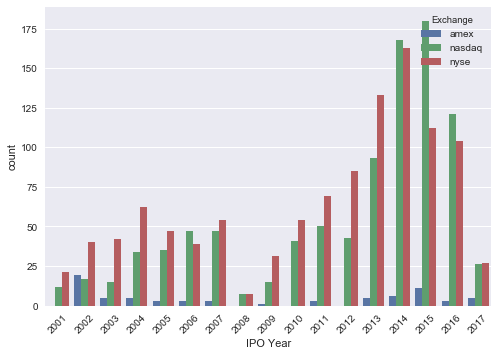

In [63]:
# Select IPOs after 2000
listing_data_1 = listing_data[listing_data['IPO Year'] > 2000]

# Convert IPO Year to integer
listing_data_1['IPO Year'] = listing_data_1['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listing_data_1)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

###  Global median per capita income over time

seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 3 columns):
Country              2959 non-null object
Year                 2959 non-null int64
Income per Capita    2959 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 69.4+ KB


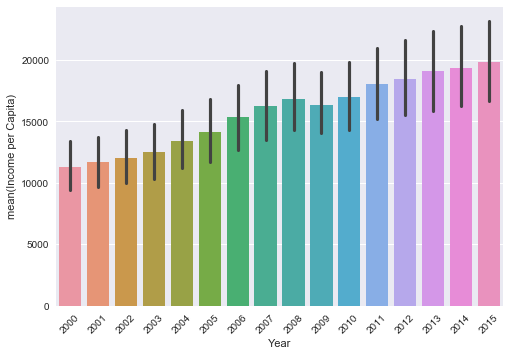

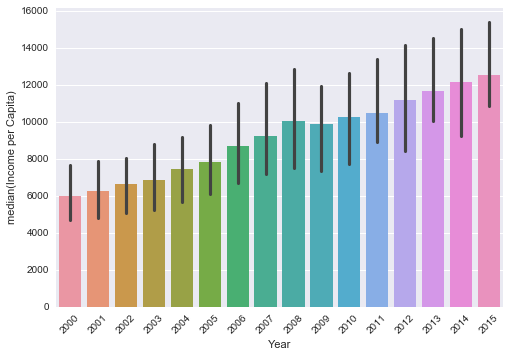

In [65]:
# Import the data
income_trend = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/income_trend.csv')

# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

###  Calculate several metrics by sector and IPO year

seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)

C:\Users\Y\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


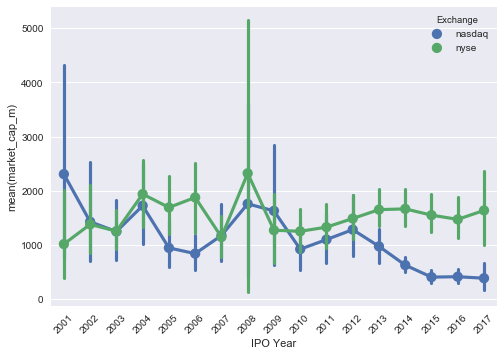

In [69]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listing_data_2 = listing_data[(listing_data['IPO Year'] > 2000) & (listing_data.Exchange != 'amex')]

# Convert IPO Year to integer
listing_data_2['IPO Year'] = listing_data_2['IPO Year'].astype(int)

# Create market_cap_m
#listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listing_data_2[listing_data_2.market_cap_m < listing_data_2.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Inflation trends in China, India, and the US

#### Result: As you can see, the inflation trends for each country vary significantly.

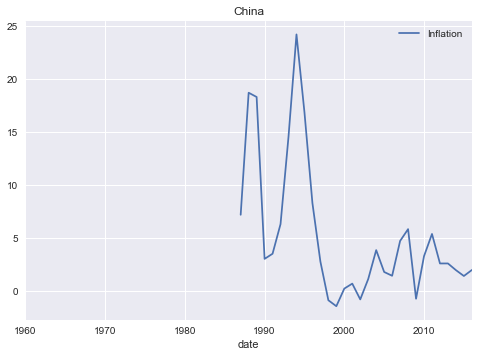

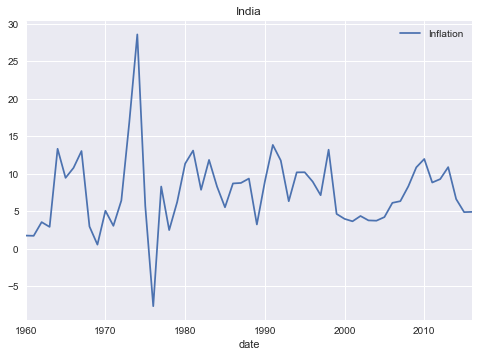

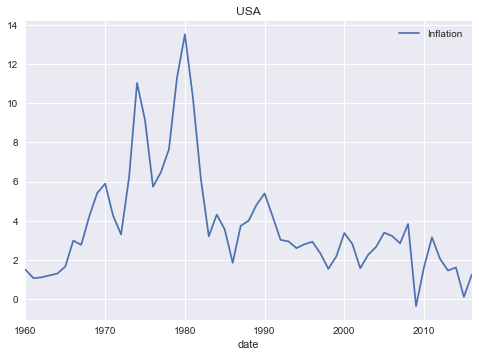

In [198]:
# Import the data
income_trend = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/income_trend_1.csv')
inflation = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/inflation_2.csv')

#income_trend.date = income_trend.date.astype(date)

# Convert the date column to datetime64
#income_trend.date = pd.to_datetime(income_trend.date)
inflation.date = pd.to_datetime(inflation.date)

# Set date column as index, Use the inplace keyword to avoid copying the DataFrame.
#income_trend.set_index('date', inplace=True)
inflation.set_index('date', inplace=True)

# Inspect the inflation data
#income_trend.info()
#income_trend.head()

#income_trend = income_trend.loc[income_trend['Country'] == ('USA','India','China')]
#inflation1 = inflation.loc[inflation['Country'] == 'USA']

# Create inflation_by_country
#inflation_by_country = income_trend.groupby('Country')
inflation_by_country = inflation.groupby('Country')
#inflation_by_country1 = inflation1.groupby('Country')


# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

###  Distribution of inflation rates in China, India, and the US

seaborn.boxplot(x=None, y=None, data=None, ...)
seaborn.swarmplot(x=None, y=None, data=None, ...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
date         171 non-null object
Country      171 non-null object
Inflation    144 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.1+ KB


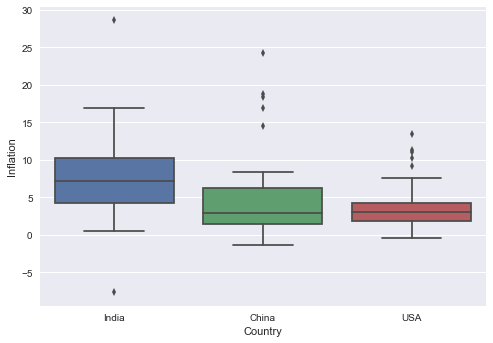

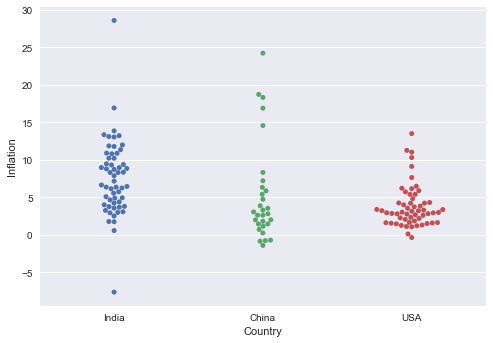

In [185]:
# Import the data
inflation = pd.read_csv('C:/Users/Y/Documents/Python/Machine_Learning/Applied_Finance/Import_Financial/inflation_2.csv')
inflation.info()

# Convert the date column to datetime64
inflation.date = pd.to_datetime(inflation.date)

# Set date column as index, Use the inplace keyword to avoid copying the DataFrame.
inflation.set_index('date', inplace=True)
inflation.head()


# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()